<a href="https://colab.research.google.com/github/RandomUser146/Project-ML-model/blob/main/ProjectMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
#importing libraries

In [2]:
#loading dataset as pandas dataframe
drive.mount('/content/drive')
df  = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,time,temperature_2m (Â°C),relativehumidity_2m (%),dewpoint_2m (Â°C),apparent_temperature (Â°C),rain (mm),snowfall (cm),weathercode (wmo code),pressure_msl (hPa),surface_pressure (hPa),...,soil_temperature_0_to_7cm (Â°C),soil_temperature_7_to_28cm (Â°C),soil_temperature_28_to_100cm (Â°C),soil_temperature_100_to_255cm (Â°C),soil_moisture_0_to_7cm (mÂ³/mÂ³),soil_moisture_7_to_28cm (mÂ³/mÂ³),soil_moisture_28_to_100cm (mÂ³/mÂ³),soil_moisture_100_to_255cm (mÂ³/mÂ³),is_day (),terrestrial_radiation (W/mÂ²)
0,2000-01-01T00:00,23.6,83,20.4,27.3,0.0,0,1,1010.7,1009.3,...,23.5,26.3,26.1,26.2,NaN,NaN,NaN,NaN,0,0.0
1,2000-01-01T01:00,22.4,89,20.5,25.9,0.0,0,2,1010.1,1008.7,...,23.3,26.2,26.1,26.2,NaN,NaN,NaN,NaN,0,0.0
2,2000-01-01T02:00,21.7,92,20.3,25.1,0.0,0,2,1009.7,1008.3,...,23.1,26.0,26.1,26.2,NaN,NaN,NaN,NaN,0,0.0
3,2000-01-01T03:00,21.7,92,20.3,25.1,0.0,0,2,1009.5,1008.1,...,23.1,25.9,26.1,26.2,NaN,NaN,NaN,NaN,0,0.0
4,2000-01-01T04:00,21.5,92,20.2,24.7,0.0,0,1,1009.2,1007.8,...,22.9,25.7,26.1,26.2,NaN,NaN,NaN,NaN,0,0.0


,temperature_2m (Â°C),relativehumidity_2m (%),surface_pressure (hPa),Rain,Day sin,Day cos,Year sin,Year cos
time,,,,,,,,
2000-01-01 00:00:00,23.6,83,1009.3,0.0,-5.461913e-12,1.000000,-0.004731,0.999989
2000-01-01 01:00:00,22.4,89,1008.7,0.0,2.588190e-01,0.965926,-0.004014,0.999992
2000-01-01 02:00:00,21.7,92,1008.3,0.0,5.000000e-01,0.866025,-0.003297,0.999995
2000-01-01 03:00:00,21.7,92,1008.1,0.0,7.071068e-01,0.707107,-0.002580,0.999997
2000-01-01 04:00:00,21.5,92,1007.8,0.0,8.660254e-01,0.500000,-0.001864,0.999998


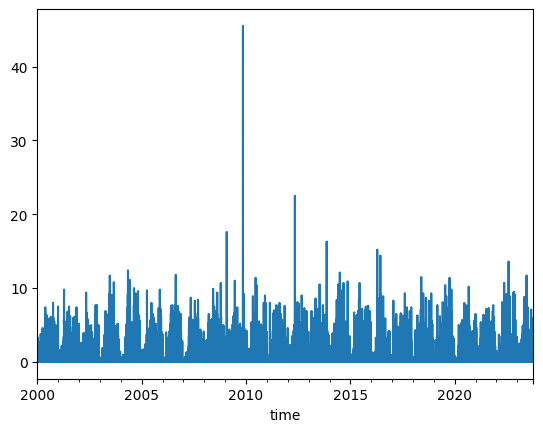

In [3]:
#setting table index
df.index = pd.to_datetime(df['time'])
temp = df['rain (mm)']
temp.plot()
temp_df = pd.DataFrame({'Rain':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
day = 60*60*24
year = 365.2425*day
#adding for creating periodicity
temp_df['Day sin'] = np.sin(temp_df['Seconds']*(2*np.pi/day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*(2*np.pi/day))
temp_df['Year sin'] = np.sin(temp_df['Seconds']*(2*np.pi/year))
temp_df['Year cos'] = np.cos(temp_df['Seconds']*(2*np.pi/year))
temp_df = temp_df.drop('Seconds',axis=1)
p_temp_df = pd.concat([df['surface_pressure (hPa)'],temp_df],axis=1)
p_temp_df = pd.concat([df['relativehumidity_2m (%)'],p_temp_df],axis=1)
p_temp_df = pd.concat([df['temperature_2m (Â°C)'],p_temp_df],axis=1)
#final output
p_temp_df.head()

In [4]:
#converting panda dataframe to x y arrays by splitting them into windows 9x8
def df_to_X_Y (df, window_size=9):
  df_as_np = df.to_numpy()
  x = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    x.append(row)
    label = df_as_np[i+window_size][3]
    y.append(label)
  return np.array(x),np.array(y)

In [5]:
#storing converted array
x,y = df_to_X_Y(p_temp_df)
#shaping the output array
x.shape,y.shape
#first index value of x array
x[0]

array([[ 2.36000000e+01,  8.30000000e+01,  1.00930000e+03,
         0.00000000e+00, -5.46191309e-12,  1.00000000e+00,
        -4.73074605e-03,  9.99988810e-01],
       [ 2.24000000e+01,  8.90000000e+01,  1.00870000e+03,
         0.00000000e+00,  2.58819045e-01,  9.65925826e-01,
        -4.01397054e-03,  9.99991944e-01],
       [ 2.17000000e+01,  9.20000000e+01,  1.00830000e+03,
         0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
        -3.29719297e-03,  9.99994564e-01],
       [ 2.17000000e+01,  9.20000000e+01,  1.00810000e+03,
         0.00000000e+00,  7.07106781e-01,  7.07106781e-01,
        -2.58041370e-03,  9.99996671e-01],
       [ 2.15000000e+01,  9.20000000e+01,  1.00780000e+03,
         0.00000000e+00,  8.66025404e-01,  5.00000000e-01,
        -1.86363310e-03,  9.99998263e-01],
       [ 2.13000000e+01,  9.20000000e+01,  1.00840000e+03,
         0.00000000e+00,  9.65925826e-01,  2.58819045e-01,
        -1.14685155e-03,  9.99999342e-01],
       [ 2.14000000e+01,  9.100000

In [6]:
#splitting arrays into training, validation and testing datasets
#total 208368 rows in dataset
x_train,y_train = x[:100000],y[:100000]
x_val,y_val = x[100000:120000],y[100000:120000]
x_test,y_test = x[120000:],y[120000:]
#shaping outputs
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape
#sample first index
x_test[0]
y_test[0]

0.9

In [7]:
#normalizing inputs to reduce bias over large magnitude values
h_training_mean = np.mean(x_train[:,:,1])
h_training_std = np.std(x_train[:,:,1])

r_training_mean = np.mean(x_train[:,:,3])
r_training_std = np.std(x_train[:,:,3])

p_training_mean = np.mean(x_train[:,:,2])
p_training_std = np.std(x_train[:,:,2])

t_training_mean = np.mean(x_train[:,:,0])
t_training_std = np.std(x_train[:,:,0])

def preprocess(x):
  x[:,:,0] = (x[:,:,0] - h_training_mean)/h_training_std
  x[:,:,1] = (x[:,:,1] - r_training_mean)/r_training_std
  x[:,:,2] = (x[:,:,2] - p_training_mean)/p_training_std
  x[:,:,3] = (x[:,:,3] - t_training_mean)/t_training_std

def preprocess_output(y):
  y[:] = (y[:] - r_training_mean)/r_training_std
  return y
print(r_training_mean)
print(r_training_std)
print(h_training_mean)
print(h_training_std)
print(t_training_mean)
print(t_training_std)
print(p_training_mean)
print(p_training_std)

0.28758077777777774
0.7389764066504841
84.14341222222222
13.33871610684333
25.96060955555557
2.5663260539356045
1008.424936
2.028680341807781


In [8]:
#preprocessing to normalize inputs
preprocess(x_train)
preprocess(x_val)
preprocess(x_test)
y_train.shape
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)
#x_train[0]
#x_val[0]
#x_test[0]
#y_train[0]
#y_val[0]
#y_test[0]

array([ 0.82873988,  1.09938452,  1.64067379, ..., -0.38916097,
       -0.38916097, -0.38916097])

In [9]:
##model definition
#Sequential model
model = Sequential()
#Uses lstm with 9x7 input
model.add(InputLayer((9,8)))
#unrolling algorithm for better working in microcontroller
model.add(LSTM(64,unroll = True))
#2 dense layers for fine tuning
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))
#display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18688     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 19217 (75.07 KB)
Trainable params: 19217 (75.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#training checkpoint
cp = ModelCheckpoint('model/',save_best_only=True) #saves best model
#compiling model
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])
#training model
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs =10,callbacks=[cp])

Epoch 1/10
3125/3125 [==============================] - 28s 8ms/step - loss: 0.9008 - root_mean_squared_error: 0.9491 - val_loss: 0.9969 - val_root_mean_squared_error: 0.9984
Epoch 2/10
3125/3125 [==============================] - 26s 8ms/step - loss: 0.8207 - root_mean_squared_error: 0.9059 - val_loss: 0.9300 - val_root_mean_squared_error: 0.9644
Epoch 3/10
3125/3125 [==============================] - 26s 8ms/step - loss: 0.7898 - root_mean_squared_error: 0.8887 - val_loss: 0.8962 - val_root_mean_squared_error: 0.9467
Epoch 4/10
3125/3125 [==============================] - 25s 8ms/step - loss: 0.7705 - root_mean_squared_error: 0.8778 - val_loss: 0.8645 - val_root_mean_squared_error: 0.9298
Epoch 5/10
3125/3125 [==============================] - 25s 8ms/step - loss: 0.7522 - root_mean_squared_error: 0.8673 - val_loss: 0.8381 - val_root_mean_squared_error: 0.9155
Epoch 6/10
3125/3125 [==============================] - 26s 8ms/step - loss: 0.7374 - root_mean_squared_error: 0.8587 - val_l

2762/2762 [==============================] - 10s 3ms/step


(       Predictions  Actuals
 0         1.029764      0.9
 1         1.231115      1.1
 2         1.448978      1.5
 3         1.603686      0.2
 4         1.150321      0.2
 ...            ...      ...
 88354     0.173624      0.0
 88355     0.135990      0.0
 88356     0.099858      0.0
 88357     0.119055      0.0
 88358     0.149332      0.0
 
 [88359 rows x 2 columns],
 0.6057569825666199)

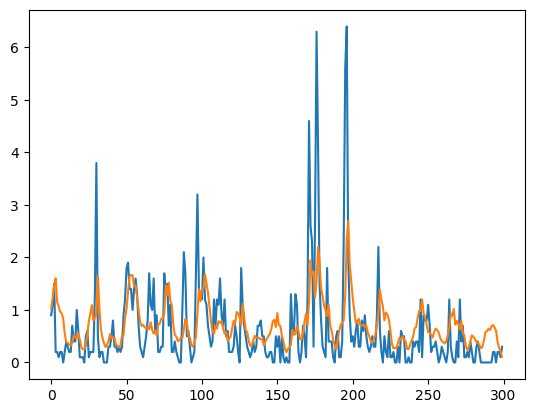

In [11]:
#plotting predictions
def post(arr):
  arr = (arr * r_training_std) + r_training_mean
  return arr
def plot_predictions(model,x,y,start=0,end=100):
  predictions = model.predict(x).flatten()
  df = pd.DataFrame(data={'Predictions':post(predictions),'Actuals':post(y)})
  plt.plot(df['Actuals'][start:end])
  plt.plot(df['Predictions'][start:end])
  return df,mse(y, predictions)
plot_predictions(model,x_test,y_test,0,300)

In [12]:
print(tf.__version__)
model_file = '/content/model' #our model file
converter = tf.lite.TFLiteConverter.from_saved_model(model_file) #initializing model converter
converter.optimizations = [tf.lite.Optimize.DEFAULT] #default optimizations
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.allow_custom_ops = False #no custom operations
tflite_model = converter.convert()
open('model.tflite','wb').write(tflite_model)

2.14.0


48616

In [13]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [14]:
# Write TFLite model to a C source (or header) file
with open('model5.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'model5'))

[1 9 8]
[[[-4.5839052e+00  1.2952026e+02  5.2993268e-01 -9.7262039e+00
    2.5881904e-01  9.6592581e-01 -9.2720103e-01 -3.7456405e-01]
  [-4.5914025e+00  1.2952026e+02  1.3558765e-01 -9.7262039e+00
    5.0000000e-01  8.6602539e-01 -9.2746925e-01 -3.7389937e-01]
  [-4.5988994e+00  1.3087349e+02  2.3417391e-01 -9.6482716e+00
    7.0710677e-01  7.0710677e-01 -9.2773706e-01 -3.7323448e-01]
  [-4.5988994e+00  1.3222672e+02  1.8488078e-01 -9.6482716e+00
    8.6602539e-01  5.0000000e-01 -9.2800432e-01 -3.7256938e-01]
  [-4.5914025e+00  1.3222672e+02  3.3276016e-01 -9.6482716e+00
    9.6592581e-01  2.5881904e-01 -9.2827117e-01 -3.7190410e-01]
  [-4.5988994e+00  1.3222672e+02  4.3134642e-01 -9.5703382e+00
    1.0000000e+00  8.5109393e-12 -9.2853749e-01 -3.7123865e-01]
  [-4.5839052e+00  1.3222672e+02  7.2710520e-01 -9.6482716e+00
    9.6592581e-01 -2.5881904e-01 -9.2880332e-01 -3.7057301e-01]
  [-4.5539174e+00  1.3087349e+02  1.0228640e+00 -9.7262039e+00
    8.6602539e-01 -5.0000000e-01 -9.2906

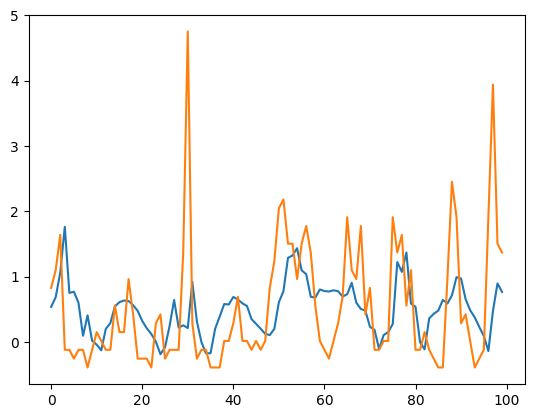

In [15]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
#x3_test[0].flatten
inp = np.array(input_shape)
input_data[0] = x_test[1]
print(input_data)
print(x_test[1])
interpreter.set_tensor(input_details[0]['index'],input_data)
print(input_details[0]['index'])

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

def plot_lite():
  predicty = []
  for i in x_test:
    input_data[0] = i
    interpreter.set_tensor(input_details[0]['index'],input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicty.append(output_data[0])
  return predicty
plt.plot(plot_lite()[0:100])
plt.plot(y_test[0:100])